# 스팸 메일 분류하기
- 캐글에서 제공하는 [스팸메일 데이터](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

## 1. 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv('data/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null int64
v2    5572 non-null object
dtypes: int64(1), object(1)
memory usage: 87.1+ KB


In [6]:
# Null 값을 가진 샘플이 있는지 확인
df.isnull().values.any()

False

In [7]:
# 데이터 중복이 있는지 확인
df['v2'].nunique()

5169

In [8]:
# 데이터 중복 제거
df = df.drop_duplicates('v2', keep='first')

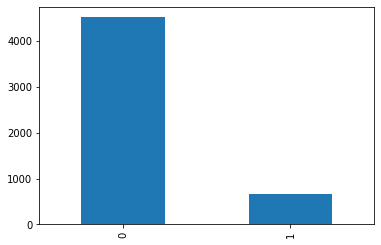

In [9]:
df['v1'].value_counts().plot(kind='bar')

In [10]:
df.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [11]:
X_data = df['v2']
y_data = df['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [13]:
print(sequences[:3])

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015]]


In [14]:
# 단어에 대한 인덱스
word_to_index = tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'at': 27,
 'or': 28,
 "i'm": 29,
 'do': 30,
 'be': 31,
 'get': 32,
 'will': 33,
 'just': 34,
 'if': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'how': 45,
 'when': 46,
 'go': 47,
 'from': 48,
 'ok': 49,
 'out': 50,
 'all': 51,
 'what': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'come': 59,
 'am': 60,
 'was': 61,
 'time': 62,
 'its': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'send': 71,
 'going': 72,
 'one': 73,
 'need': 74,
 'by': 75,
 'lor': 76,
 'home': 77,
 'as': 78,
 'about': 79,
 'still': 80,
 'see': 81,
 'txt': 82,
 'back': 83,
 'r': 84,
 'sto

In [15]:
vocab_size = len(word_to_index)+1
vocab_size

8921

메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


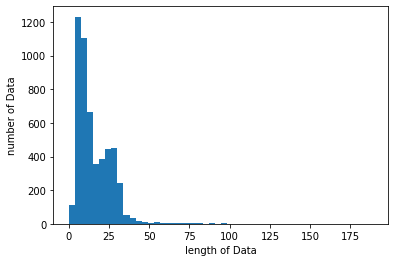

In [16]:
X_data=sequences
max_len = max(len(l) for l in X_data)
print('메일의 최대 길이 : %d' % max_len)
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))

plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [17]:
# 전체 데이터셋의 길이를 max_len(189)에 맞춤
data = pad_sequences(X_data, maxlen=max_len)
data.shape

(5169, 189)

In [18]:
# 테스트용 데이터 20% 분리
n_of_train = int(5169 * 0.8)
n_of_test = int(5169 - n_of_train)
print(n_of_train, n_of_test)

4135 1034


In [19]:
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:])
X_train = data[:n_of_train] 
y_train = np.array(y_data[:n_of_train]) 

## 2. 모델 설계 및 학습

In [21]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32))             # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          285472    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 287,585
Trainable params: 287,585
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [24]:
# 훈련용 데이터 중에서 20%는 검증 데이터로 사용
history = model.fit(X_train, y_train, epochs=4, batch_size=60, validation_split=0.2)

Train on 3308 samples, validate on 827 samples
Epoch 1/4
3308/3308 [==============================] - 3s 830us/sample - loss: 0.3877 - accuracy: 0.8736 - val_loss: 0.2515 - val_accuracy: 0.8984
Epoch 2/4
3308/3308 [==============================] - 2s 511us/sample - loss: 0.1340 - accuracy: 0.9655 - val_loss: 0.0986 - val_accuracy: 0.9686
Epoch 3/4
3308/3308 [==============================] - 2s 505us/sample - loss: 0.0565 - accuracy: 0.9858 - val_loss: 0.0838 - val_accuracy: 0.9770
Epoch 4/4
3308/3308 [==============================] - 2s 506us/sample - loss: 0.0875 - accuracy: 0.9652 - val_loss: 0.1093 - val_accuracy: 0.9613


In [26]:
# 테스트 정확도
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

1034/1 - 0s - loss: 0.0699 - accuracy: 0.9642

 테스트 정확도: 0.9642


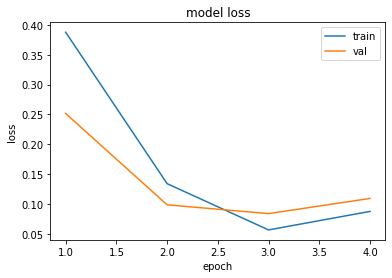

In [29]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()